In [8]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
from langid.langid import LanguageIdentifier, model
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from six.moves import zip

In [53]:
base_path = "/media/ruben/Data Drive/react-data/protest/carlo-batch-selection"

# Open translation file
refdf = pd.read_csv("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/descriptive-full.csv")
refdf = dict(zip(refdf['image'],refdf['pretty_title']))

In [33]:
d_ = dict()

for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]:
    photo_folder = os.path.join(base_path, photo)
    
    with open(os.path.join(photo_folder,'languages-'+photo+".json"),'r') as f:
        lang = json.load(f)
    
    languages = []
    photo = photo.split('/')[-1].split('-')[-1].replace('.json','')
    photo = refdf[int(photo)]
    for iterkey,items1 in lang.items():
        
        for link,lan in items1.items():
            
            if lan[0] not in d_.keys():
                d_.update({lan[0]:dict()})
            if photo not in d_[lan[0]].keys():
                d_[lan[0]].update({photo:0})
            else:
                d_[lan[0]][photo] += 1

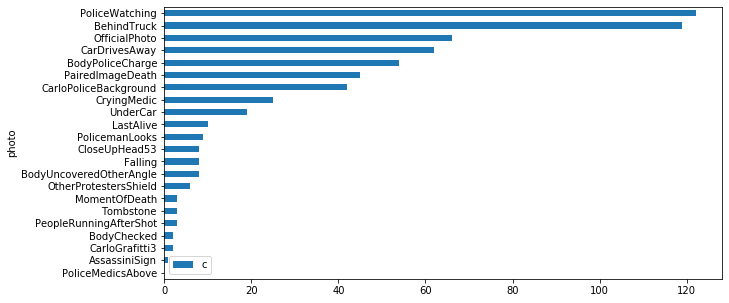

In [41]:
pd.DataFrame(d_['en'].items(),columns=['photo','c']).sort_values('c').plot.barh(x='photo',figsize=(10,5))

In [45]:
total = [list(x.items()) for key,x in d_.items()]
total = [item for sublist in total for item in sublist]
pd.DataFrame(total,columns=['photo','c']).groupby('photo').sum().reset_index().sort_values('c').plot.barh(x='photo',figsize=(10,5))

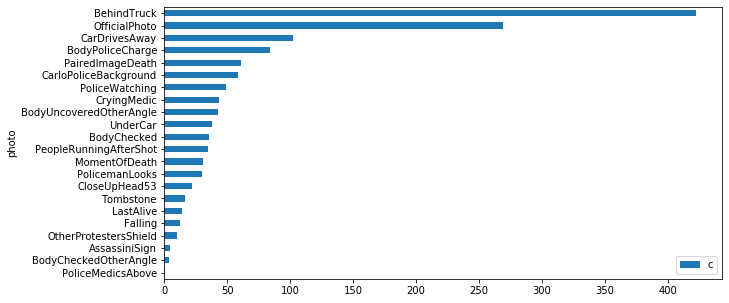

In [52]:
pd.DataFrame(d_['it'].items(),columns=['photo','c']).sort_values('c').plot.barh(x='photo',figsize=(10,5))

In [54]:
refdf

{2: 'PairedImageDeath',
 3: 'OfficialPhoto',
 4: 'Tombstone',
 7: 'BehindTruck',
 8: 'MomentOfDeath',
 9: 'LastAlive',
 11: 'Falling',
 12: 'PeopleRunningAfterShot',
 13: 'UnderCar',
 14: 'CarDrivesAway',
 16: 'CloseUpHead53',
 17: 'OtherProtestersShield',
 18: 'BodyChecked',
 19: 'BodyCheckedOtherAngle',
 21: 'BodyPoliceCharge',
 22: 'PolicemanLooks',
 24: 'PoliceMedicsAbove',
 25: 'CryingMedic',
 27: 'BodyUncoveredOtherAngle',
 28: 'PoliceWatching',
 59: 'AssassiniSign',
 60: 'CarloPoliceBackground',
 63: 'CarloGrafitti3'}